In [ ]:
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import time
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/clean.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.replace(to_replace='None', value=np.nan).dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, test_size = 0.2,random_state=2)

In [ ]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [ ]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 300),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1855/1855 [==============================] - 103s 49ms/step - loss: 0.3656 - accuracy: 0.7981 - val_loss: 0.2895 - val_accuracy: 0.8414
Epoch 2/10
1855/1855 [==============================] - 89s 48ms/step - loss: 0.2620 - accuracy: 0.8499 - val_loss: 0.2712 - val_accuracy: 0.8470
Epoch 3/10
1855/1855 [==============================] - 89s 48ms/step - loss: 0.2334 - accuracy: 0.8608 - val_loss: 0.2796 - val_accuracy: 0.8455
Epoch 4/10
1855/1855 [==============================] - 90s 48ms/step - loss: 0.2178 - accuracy: 0.8667 - val_loss: 0.3195 - val_accuracy: 0.8369


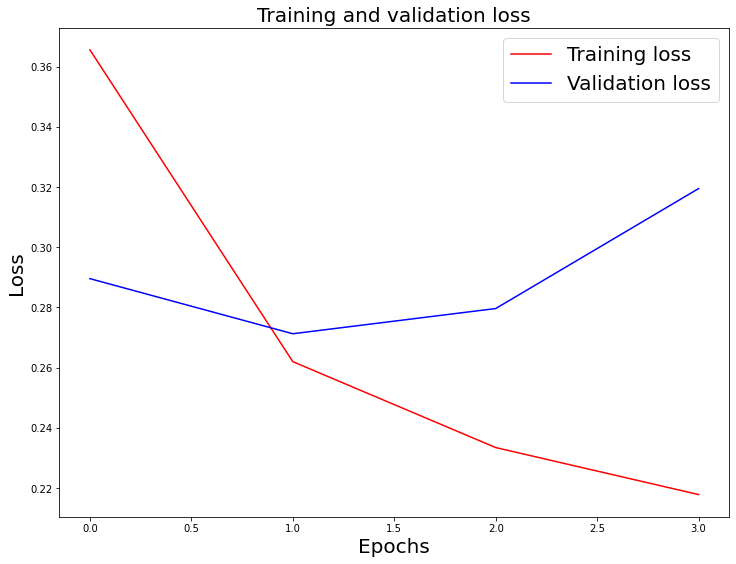

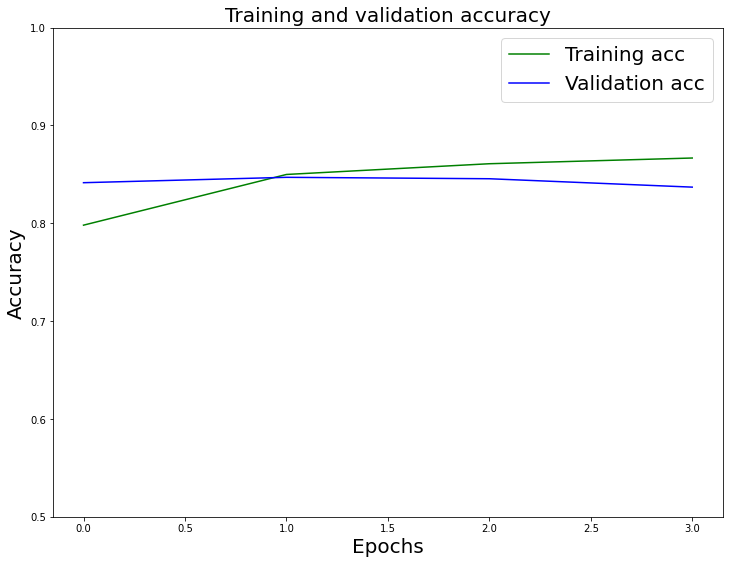

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

483/483 [==============================] - 10s 22ms/step - loss: 0.2800 - accuracy: 0.8381


[0.2800416350364685, 0.8381439447402954]

In [ ]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.8381439295884028
Precision on testing set: 0.6830423202130808
Recall on testing set: 0.9278391959798995


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 300),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         3000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        140544    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               14016     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1855/1855 [==============================] - 89s 44ms/step - loss: 0.3279 - accuracy: 0.8136 - val_loss: 0.2632 - val_accuracy: 0.8329
Epoch 2/10
1855/1855 [==============================] - 84s 45ms/step - loss: 0.2417 - accuracy: 0.8535 - val_loss: 0.2658 - val_accuracy: 0.8458
Epoch 3/10
1855/1855 [==============================] - 82s 44ms/step - loss: 0.2207 - accuracy: 0.8644 - val_loss: 0.2722 - val_accuracy: 0.8424


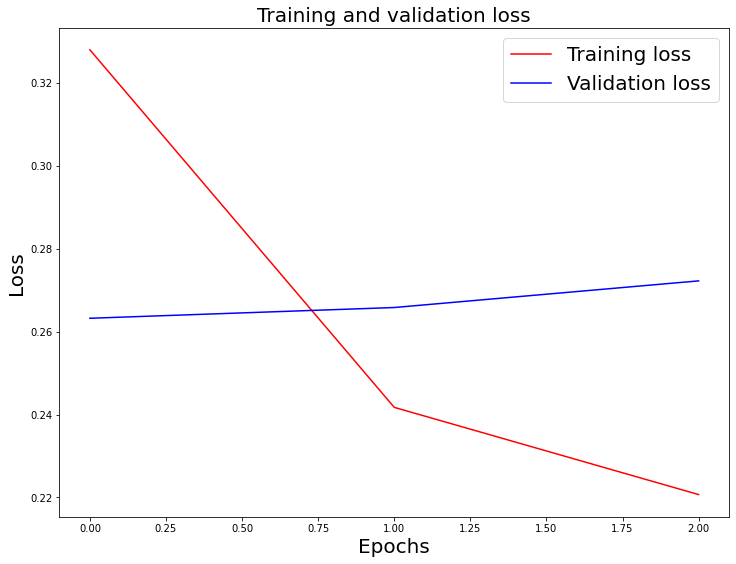

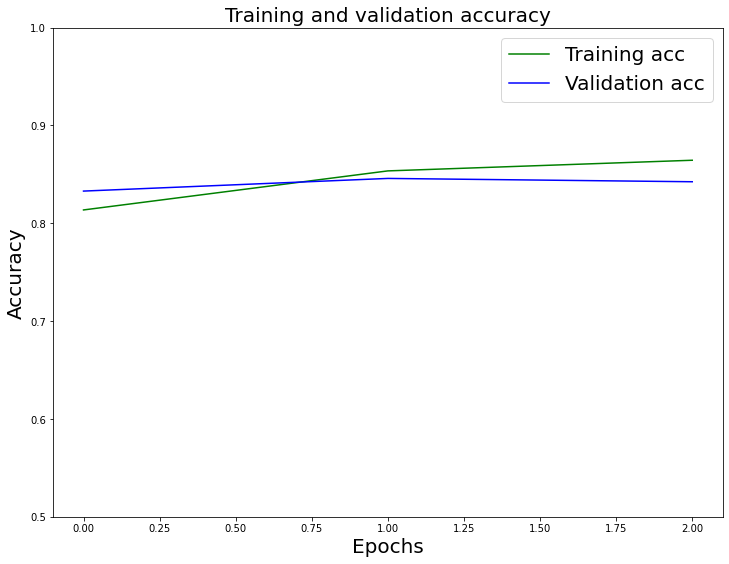

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

483/483 [==============================] - 10s 20ms/step - loss: 0.2720 - accuracy: 0.8286


[0.27196162939071655, 0.8286306262016296]

In [ ]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.8286305979808439
Precision on testing set: 0.6247410476472329
Recall on testing set: 0.9741578218735579


In [ ]:
SEQUENCE_LENGTH = 256
VOCAB_LENGTH = 10000
VECTOR_SIZE = 100

def getModel():
    """
    Returns a trainable Sigmoid Convolutional Neural Network
    """
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim= VOCAB_LENGTH, output_dim=VECTOR_SIZE, input_length=SEQUENCE_LENGTH))
    
    model.add(layers.Conv1D(128,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Conv1D(256,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Conv1D(512,kernel_size=4))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling1D(2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    
    return model

In [ ]:
model = getModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 253, 128)          51328     
                                                                 
 batch_normalization (BatchN  (None, 253, 128)         512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 253, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 123, 256)         

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1932/1932 [==============================] - 30s 12ms/step - loss: 0.4404 - accuracy: 0.7942 - val_loss: 0.3938 - val_accuracy: 0.8037
Epoch 2/5
1932/1932 [==============================] - 23s 12ms/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.3392 - val_accuracy: 0.8209
Epoch 3/5
1932/1932 [==============================] - 22s 12ms/step - loss: 0.2782 - accuracy: 0.8449 - val_loss: 0.5885 - val_accuracy: 0.8180
Epoch 4/5
1932/1932 [==============================] - 23s 12ms/step - loss: 0.2590 - accuracy: 0.8519 - val_loss: 0.3248 - val_accuracy: 0.8132
Epoch 5/5
1932/1932 [==============================] - 23s 12ms/step - loss: 0.2425 - accuracy: 0.8574 - val_loss: 0.3586 - val_accuracy: 0.8112


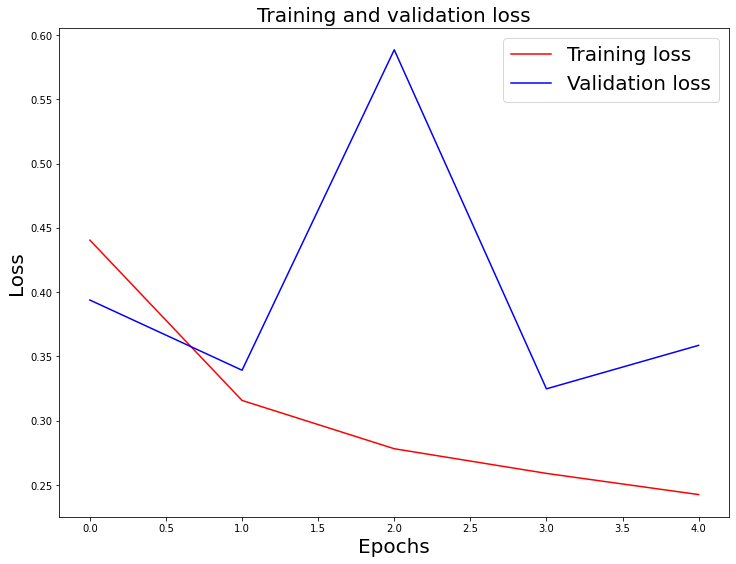

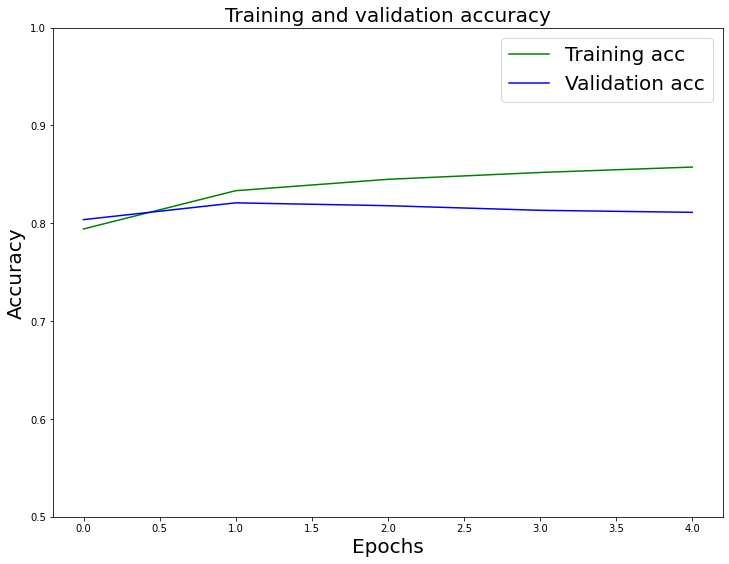

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 300),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
print("Training Complete")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         3000000   
                                                                 
 dropout_5 (Dropout)         (None, None, 300)         0         
                                                                 
 conv1d_5 (Conv1D)           (None, None, 64)          96064     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 bidirectional_7 (Bidirectio  (None, None, 128)        49920     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 32)              

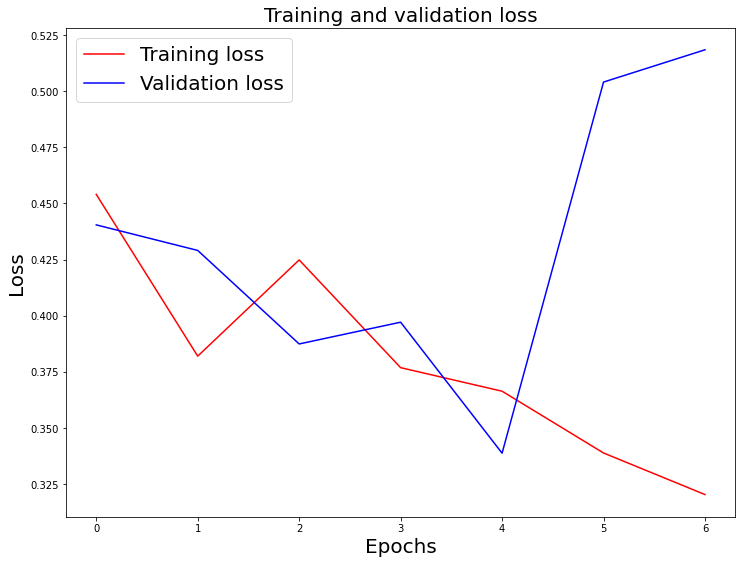

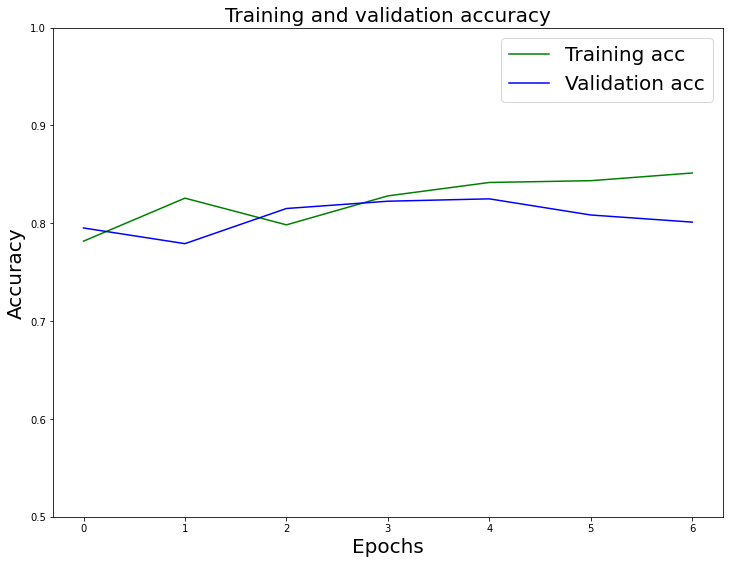

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

483/483 [==============================] - 6s 12ms/step - loss: 0.3612 - accuracy: 0.8218


[0.36115679144859314, 0.8218353390693665]

In [ ]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.8218353611183018
Precision on testing set: 0.6509322284699616
Recall on testing set: 0.917796786981014
